In [438]:
import pandas as pd
import numpy as np
import regex as re
from plotnine import *
transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [439]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [440]:
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [441]:
customerData.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [442]:
transactionData.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [443]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin = "1899-12-30", unit = "D")

In [444]:
transactionData['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [445]:
transactionData['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [446]:
#see how many unique products we have
transactionData['PROD_NAME'].nunique

<bound method IndexOpsMixin.nunique of 0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object>

In [447]:
#see if the variable contains special character
transactionData['PROD_NAME'].str.contains('&')

0         False
1         False
2         False
3          True
4          True
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Name: PROD_NAME, Length: 264836, dtype: bool

In [448]:
#chracters to replace
char_to_replace = ('&',
                   '*',
                   '/',
                   '@',
                   '#',
                   '$',
                   '%',
                   '^',
                   '*',
                   '(',
                   ')',
                   '-',
                   '_',
                   '=',
                   '+',
                   '?',
                   ',',
                   ';',
                   ':',
                   '\'',
                   '\"',
                   '<',
                   '>',
                   '[',
                   ']',
                   '{',
                   '}')

In [449]:
#delete all the speical characters
prodName = transactionData.PROD_NAME
for  i in range(len(prodName)):
    for j in char_to_replace:
        if j in transactionData.PROD_NAME[i]:
            prodName[i] = transactionData.PROD_NAME[i].replace(j, " ")
prodName.head(10)

<ipython-input-449-a4f1bd82aea9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      Natural Chip        Compny SeaSalt175g
1                    CCs Nacho Cheese    175g
2      Smiths Crinkle Cut  Chips Chicken 170g
3      Smiths Chip Thinly  S Cream Onion 175g
4    Kettle Tortilla ChpsHny Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
6    Smiths Crinkle Chips Salt   Vinegar 330g
7       Grain Waves         Sweet Chilli 210g
8     Doritos Corn Chip Mexican Jalapeno 150g
9       Grain Waves Sour    Cream Chives 210G
Name: PROD_NAME, dtype: object

In [450]:
#count all the unique items

prodName.value_counts()

Kettle Mozzarella   Basil   Pesto 175g      3304
Kettle Tortilla ChpsHny Jlpno Chili 150g    3296
Cobs Popd Swt Chlli  Sr Cream Chips 110g    3269
Tyrrells Crisps     Ched   Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream      Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [451]:
#print without Salsa products

transactionData = transactionData[-transactionData['PROD_NAME'].str.contains('Salsa')]

In [452]:
transactionData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt Vinegar 330g,1,5.7
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream Chives 210G,2,7.2
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt Vinegar 330g,1,5.7


In [453]:
#see if there is any outliers

transactionData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


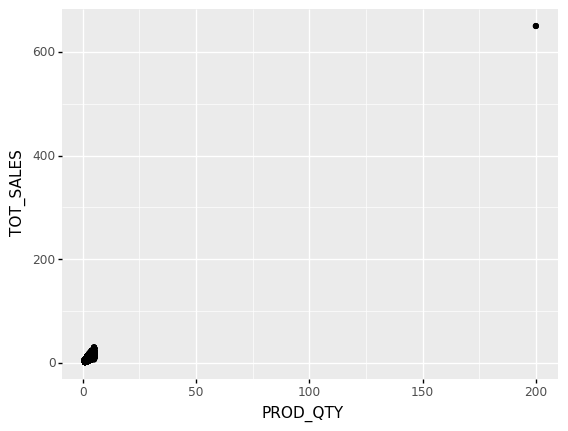

<ggplot: (157639349959)>

In [454]:
#dot graph to see any outliers or patterns
ggplot(transactionData, aes(x = 'PROD_QTY', y = 'TOT_SALES')) + geom_point()

In [455]:
#found outliers from ggplot. now find those outliers.

transactionData[transactionData.PROD_QTY == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [456]:
#identify the purchase history of the same customer

transactionData[-(transactionData.LYLTY_CARD_NBR == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [457]:
#remove outlier customer information out of our data

transactionData = transactionData[-(transactionData.LYLTY_CARD_NBR == 226000)]

In [458]:
#proof of 226000 customer got rid of.

transactionData[(transactionData.LYLTY_CARD_NBR == 226000)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [459]:
#count all transacdtions by dates
countTransaction = transactionData.groupby('DATE').count()
countTransaction

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673


In [460]:
#find missing dates
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(countTransaction.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [461]:
#add missing date and values to the row
countTransaction.loc['2018-12-25'] = 0

In [462]:
#move back 'DATE' index back to data set and sort by Date.
countTransaction = countTransaction.reset_index().sort_values('DATE')

In [463]:
#check if DATE label is returned to a variable
countTransaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 363
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            365 non-null    datetime64[ns]
 1   STORE_NBR       365 non-null    int64         
 2   LYLTY_CARD_NBR  365 non-null    int64         
 3   TXN_ID          365 non-null    int64         
 4   PROD_NBR        365 non-null    int64         
 5   PROD_NAME       365 non-null    int64         
 6   PROD_QTY        365 non-null    int64         
 7   TOT_SALES       365 non-null    int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 25.7 KB


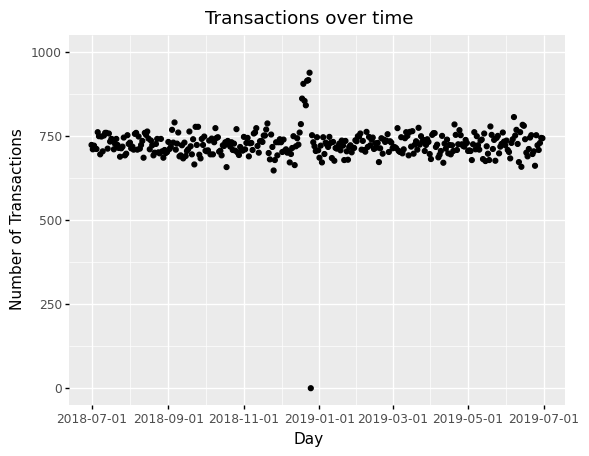

<ggplot: (157637232872)>

In [464]:
#show transactions per month graph
(
    ggplot(a)
    + aes(x = 'DATE', y = 'TOT_SALES')
    + geom_point()
    + labs(x = "Day", y = "Number of Transactions", title = "Transactions over time")
    + ylim(0, 1000)
    #+ ylim()
    #+ scale_x_date(breaks = '1 month', labels = '%d')
)

C:\Users\jang\anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 334 rows containing missing values.


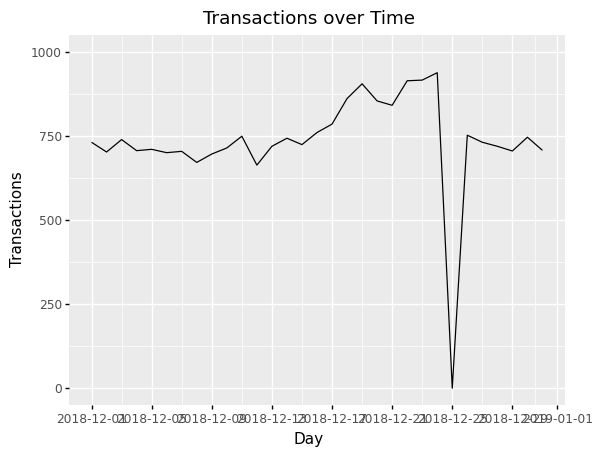

<ggplot: (157624450178)>

In [465]:
#look closer between dec 01 - dec 31
(
    ggplot(a)
    + aes(x = 'DATE', y = 'TOT_SALES')
    + geom_line()
    + labs(x = "Day", y = "Transactions", title = "Transactions over Time")
    + ylim(0, 1000)
    #+ xlim('2018-12-01', '2018-12-31')
    + scale_x_date(limits = ('2018-12-01', '2018-12-31'))
)

In [466]:
#extract product weight from PROD_NAME
transactionData["PACK_SIZE"] = transactionData.PROD_NAME.str.extract(r'([0-9]+[gG])')[0].str.replace("[gG]", "").astype("int64")

<ipython-input-466-b381662de2fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [467]:
#check if it worked
transactionData.PACK_SIZE.head(10)

0     175
1     175
2     170
3     175
4     150
6     330
7     210
8     150
9     210
10    330
Name: PACK_SIZE, dtype: int64

In [468]:
#try to create Weight variable much faster

#transactionData.Weight = transactionData.PROD_NAME.str.extract(pat = r'[0-9][0-9][0-9][gG]')
#splitted = transactionData.PROD_NAME.str.split(" ")
#takes way too long time to run. need better suggestion.
#create Weight variable by dividing product name and the weight from PROD_NAME

#    transactionData.PACK_SIZE = splitted[i][len(splitted[i]) - 1]

C:\Users\jang\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 389'. Pick better value with 'binwidth'.


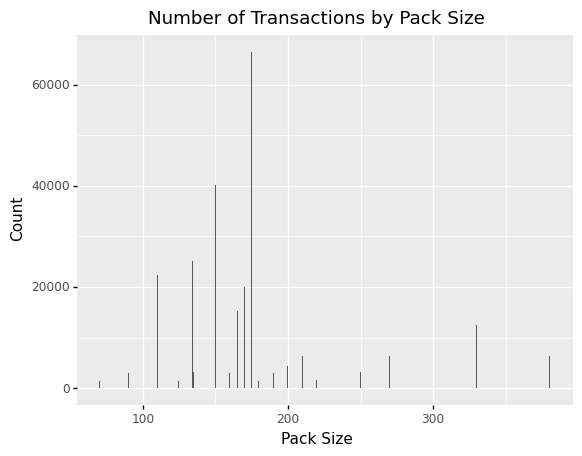

<ggplot: (157632724297)>

In [469]:
#count the total transactins compared by pack sizes.
(
    ggplot(transactionData)
    + aes(x = 'PACK_SIZE')
    + geom_histogram()
    + labs(x = "Pack Size", y = "Count", title = "Number of Transactions by Pack Size")
    
)

In [470]:
#extract brands by splitting first word of each rows
transactionData.Brands = transactionData.PROD_NAME.str.split(r"([A-Z][a-zA-Z]+)", expand=True)[1]
transactionData.Brands.head(10)

<ipython-input-470-380aa1883118>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


0     Natural
1         CCs
2      Smiths
3      Smiths
4      Kettle
6      Smiths
7       Grain
8     Doritos
9       Grain
10     Smiths
Name: 1, dtype: object

In [471]:
#Clean brand names
transactionData.Brands.replace("RED", "RRD")

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: 1, Length: 246740, dtype: object

In [472]:
#check if it's done right
[col for col in transactionData.Brands if 'RED' in col]

[]

In [473]:
#find names that should be changed
sorted(transactionData.Brands.unique())

['Burger',
 'CCs',
 'Cheetos',
 'Cheezels',
 'Cobs',
 'Dorito',
 'Doritos',
 'French',
 'Grain',
 'GrnWves',
 'Infuzions',
 'Infzns',
 'Kettle',
 'NCC',
 'Natural',
 'Pringles',
 'RRD',
 'Red',
 'Smith',
 'Smiths',
 'Snbts',
 'Sunbites',
 'Thins',
 'Tostitos',
 'Twisties',
 'Tyrrells',
 'WW',
 'Woolworths']

In [474]:
#fix brand names
brandName = {
             'Red':'RRD',
             'Dorito':'Doritos',
             'Infzns':'Infuzions',
             'Smith':'Smiths',
             'Snbts':'Sunbites',
             'WW':'Woolworths'
            }

def clean_name(val):
    if val in brandName:
        return brandName[val]
    else:
        return val
    
transactionData.Brands = transactionData.Brands.apply(clean_name)

In [475]:
#check if applied appropriately
transactionData.Brands.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'RRD', 'Pringles', 'GrnWves', 'Tyrrells', 'Cobs',
       'French', 'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [476]:
#exploring customer data
customerData.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [477]:
#exploring customer data
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [478]:
#checking if all values in LYLTY_CARD_NBR are unique
customerData['LYLTY_CARD_NBR'].nunique()

72637

In [479]:
#merge dataset
mergedData = pd.merge(transactionData, customerData, how='outer')

In [492]:
mergedData.LYLTY_CARD_NBR.nunique()

72637

In [480]:
#check if applied properly
mergedData.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1.0,1307,346.0,96.0,WW Original Stacked Chips 160g,2.0,3.8,160.0,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1.0,1307,347.0,54.0,CCs Original 175g,1.0,2.1,175.0,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,MIDAGE SINGLES/COUPLES,Budget
5,2018-08-17,2.0,2373,974.0,69.0,Smiths Chip Thinly S Cream Onion 175g,5.0,15.0,175.0,MIDAGE SINGLES/COUPLES,Budget
6,2018-08-18,2.0,2426,1038.0,108.0,Kettle Tortilla ChpsHny Jlpno Chili 150g,3.0,13.8,150.0,MIDAGE SINGLES/COUPLES,Budget
7,2019-05-16,4.0,4149,3333.0,16.0,Smiths Crinkle Chips Salt Vinegar 330g,1.0,5.7,330.0,MIDAGE SINGLES/COUPLES,Budget
8,2018-07-06,4.0,4149,3330.0,46.0,Kettle Original 175g,2.0,10.8,175.0,MIDAGE SINGLES/COUPLES,Budget
9,2018-07-18,4.0,4149,3331.0,112.0,Tyrrells Crisps Ched Chives 165g,2.0,8.4,165.0,MIDAGE SINGLES/COUPLES,Budget


In [481]:
#check for null
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248090 entries, 0 to 248089
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  float64       
 2   LYLTY_CARD_NBR    248090 non-null  int64         
 3   TXN_ID            246740 non-null  float64       
 4   PROD_NBR          246740 non-null  float64       
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  float64       
 7   TOT_SALES         246740 non-null  float64       
 8   PACK_SIZE         246740 non-null  float64       
 9   LIFESTAGE         248090 non-null  object        
 10  PREMIUM_CUSTOMER  248090 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 22.7+ MB


In [482]:
#save file for task 2
mergedData.to_csv('QVI_data.csv')

In [483]:
#Total Sale by LIFESTAGE
totalbyLife = mergedData.groupby('LIFESTAGE').sum()['TOT_SALES']
totalbyLife.sort_values(ascending = False)

LIFESTAGE
OLDER SINGLES/COUPLES     376019.65
RETIREES                  342381.90
OLDER FAMILIES            328519.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
Name: TOT_SALES, dtype: float64

In [484]:
#Total Sale by PREMIUM_CUSTOMER
totalbyPremium = mergedData.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']
totalbyPremium.sort_values(ascending = False)

PREMIUM_CUSTOMER
Mainstream    700865.40
Budget        631406.85
Premium       472905.45
Name: TOT_SALES, dtype: float64

In [485]:
#Total Sale by both LIFESTAGE and PREMIUM_CUSTOMER
#totalbyBoth = mergedData.groupby('LIFESTAGE').sum()['TOT_SALES']
#totalbyBoth.sort_values(ascending = False)
totalbyBoth = mergedData.pivot(columns = ('LIFESTAGE', 'PREMIUM_CUSTOMER'), values = 'TOT_SALES').agg('sum')
totalbyBoth

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Premium              39052.30
MIDAGE SINGLES/COUPLES  Budget               33345.70
                        Mainstream           84734.25
                        Premium              54443.85
NEW FAMILIES            Budget               20607.45
                        Mainstream           15979.70
                        Premium              10760.80
OLDER FAMILIES          Budget              156863.75
                        Mainstream           96413.55
                        Premium              75242.60
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
                        Mainstream          145168.95
                        Premium              91296.65
YOUNG FAMILIES          Budget              129717.95
                        Mainstream       

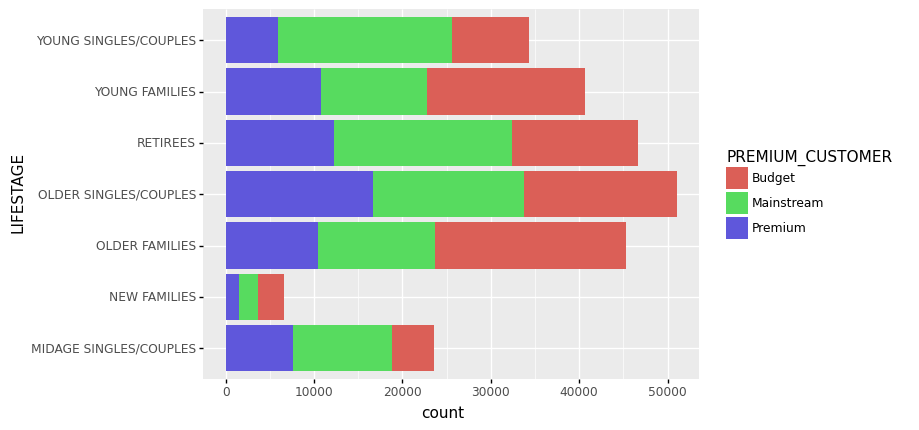

<ggplot: (157635018786)>

In [488]:
#bar plot of total sales by LIFESTAGE grouped by membership
(
    ggplot(mergedData) +
    geom_bar() +
    aes('LIFESTAGE', fill = 'PREMIUM_CUSTOMER') +
    coord_flip()
)

In [496]:
#number of customers by groups
countbyBoth = mergedData.pivot(columns = ('LIFESTAGE', 'PREMIUM_CUSTOMER'), values = 'TOT_SALES').agg('count')
countbyBoth

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Premium              5852
MIDAGE SINGLES/COUPLES  Budget               4691
                        Mainstream          11095
                        Premium              7612
NEW FAMILIES            Budget               2824
                        Mainstream           2185
                        Premium              1488
OLDER FAMILIES          Budget              21514
                        Mainstream          13241
                        Premium             10403
OLDER SINGLES/COUPLES   Budget              17172
                        Mainstream          17061
                        Premium             16560
RETIREES                Budget              14225
                        Mainstream          19970
                        Premium             12236
YOUNG FAMILIES          Budget              17763
                        Mainstream          11947
                        Premium             10784
YOUNG SIN

In [498]:
#bar plot of the number of customers by LIFESTAGE grouped by membership
(
    ggplot(countbyBoth) +
    geom_bar() +
    aes(x ='LIFESTAGE', fill = 'PREMIUM_CUSTOMER') +
    coord_flip()
)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().